In [6]:
from genetic_algorithm.GA import GeneticAlgorithm as GA
from TabuSearch.TS import TabuSearch as TS
from TabuSearch.utils import *
from Simulated_Annealing.Simulated_Annealing import SimulatedAnnealing as SA
from Simulated_Annealing.utils import * 

from sklearn.preprocessing import MinMaxScaler
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import functools

# Leer grafo Instancia 3 : 125 nodos

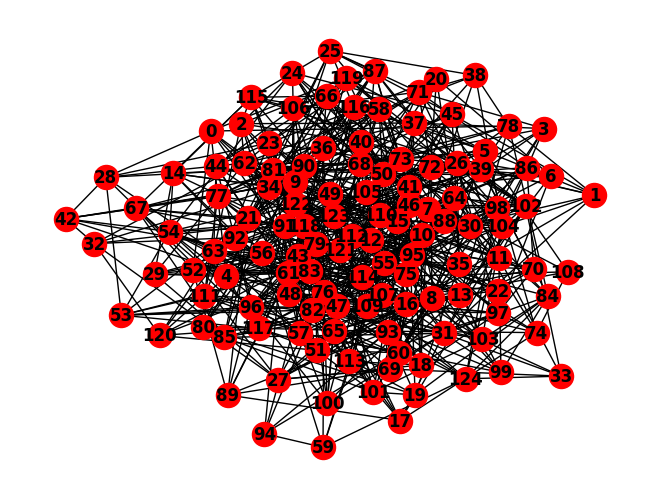

In [7]:
import csv
graph = []
with open('instancias/125nodos.csv', 'r', newline='') as file:
    myreader = csv.reader(file, delimiter=',')
    for row in myreader:
        # Convierte cada elemento de la fila en un entero
        int_row = [int(cell) for cell in row]
        graph.append(int_row)
graph = np.array(graph)
n = len(graph)
G = nx.from_numpy_array(graph)
nx.draw(G, with_labels=True, node_color='red', font_weight='bold')
plt.show()

# Funcion de Costo

In [8]:

def graph_coloring(solucion, graph):
	ncolores=len(set(solucion))
	conflicts = 0
	for u, v in graph.edges():
		if solucion[u] == solucion[v]:
			conflicts += 1
	return conflicts + ncolores

fn = functools.partial(graph_coloring,graph =G)
max_call = 15000

### Parametros Simulated Annealing

In [9]:
parametrosSA = {
    "verbose": False,
    "stopping_criteria_type": "function_calls",
    "max_call_functions": max_call,
    "problem_type": "COP",
    "codification": "combination",
    "cooling": "geometric",
    "min_or_max":"min",
    "limits": (1, n),
    "precision": 1,
    "variables":1,
    "alpha": 0.99,
    "beta": 0.8,
    "time": 1,
    "equilibrium": 1,
    "temperature": 600,
    "final_temperature": 0.01,
}

### Parametros TabuSearch

In [10]:
first_solution = create_first_solution("combination", n)
parametrosTS = {
    "verbose": False,
    "first_point":first_solution,
    "tabu_list_size":20,
    "number_of_points": 200,
    "diversification_type": "static",
	"diversification_size": 100,
    "stopping_criteria_type":"function_calls",
    "max_call_functions": max_call,
    "long_term_memory_reset" : True,
    "problem_type": "COP",
	"min_or_max": "min",
    "codification": "combination"
}

### Parametros Genetic Algorithm

In [11]:
parametrosGA = {
    "verbose":False,
    "stopping_criteria_type":"function_calls",
    "max_call_functions": max_call,
    "population_size": 100,
    "selection_operator": "tournament",
    "crossover_operator": "onepoint",
    "mutation_operator":"swap",
    "problem_type": "COP",
    "limits":(0,n),
	"min_or_max": "min",
    "codification": "combination"
}

In [12]:
valores_optimos_sa = []
valores_optimos_ts = []
valores_optimos_ga = []

## Prueba 1

Simulated_Annealing
7501 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 26  | Aceptance: 100.00 | Function Call: 15000
Tiempo de ejecución: 00:00:09
------------------------------------------------
TabuSearch
iterations 75 | call_functions 15000 | Best: 39.00000 | actual_sol: 39.00000
Tiempo de ejecución: 00:00:09
------------------------------------------------
Genetic Algorithm


 Generations 150 | call_functions 15000 | Best: 52.00

Tiempo de ejecución: 00:00:09
------------------------------------------------


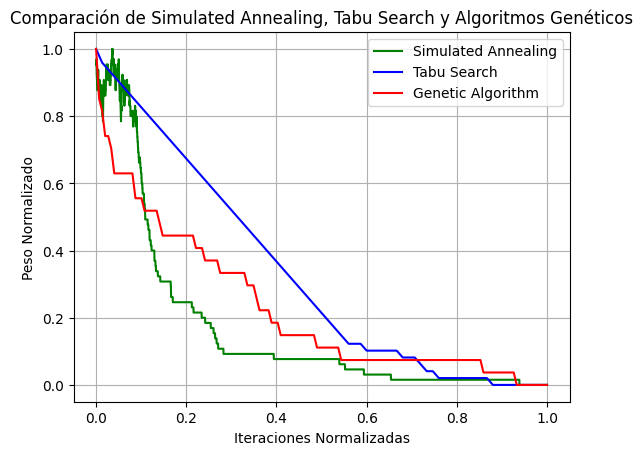

In [13]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 2

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 10  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 14.00000 | actual_sol: 14.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm
Tiempo de ejecución: 00:00:00
------------------------------------------------


 Generations 100 | call_functions 10000 | Best: 16.00

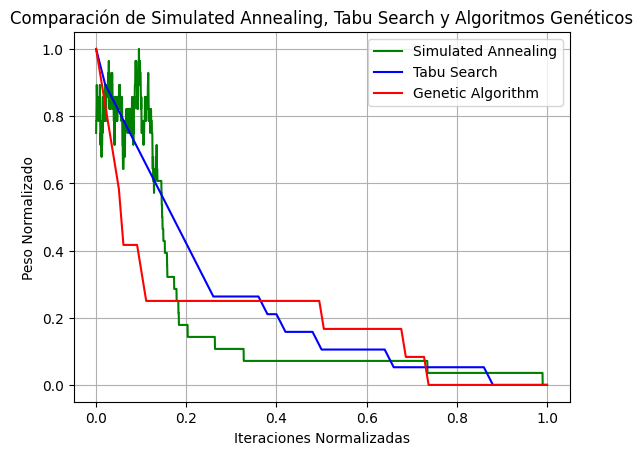

In [19]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 3

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 11  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 13.00000 | actual_sol: 14.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm
Tiempo de ejecución: 00:00:01
------------------------------------------------


 Generations 100 | call_functions 10000 | Best: 16.00

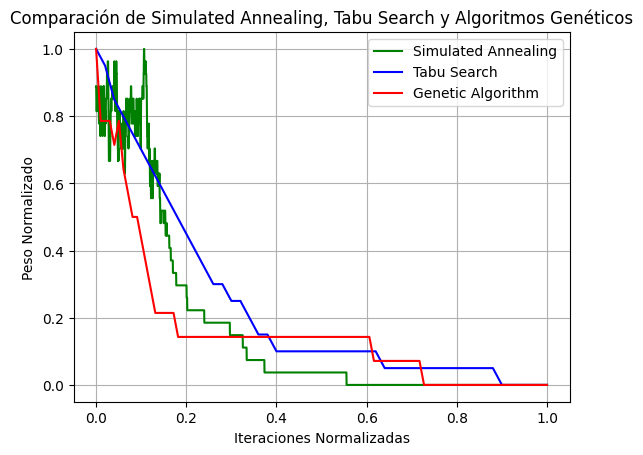

In [20]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 4

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 10  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 15.00000 | actual_sol: 16.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm


 Generations 100 | call_functions 10000 | Best: 16.00

Tiempo de ejecución: 00:00:01
------------------------------------------------


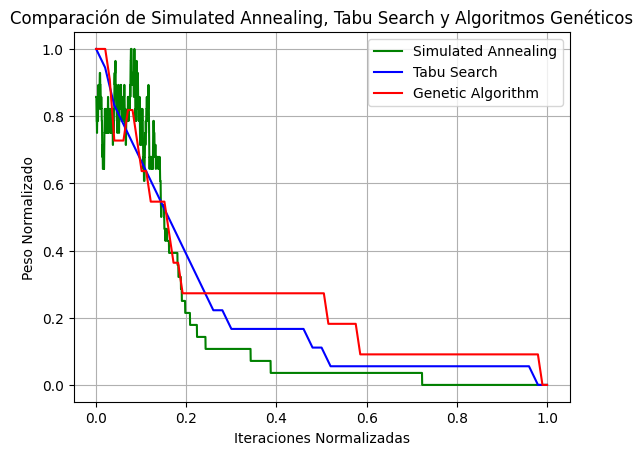

In [21]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 5

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 10  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 12.00000 | actual_sol: 12.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm


 Generations 100 | call_functions 10000 | Best: 16.00

Tiempo de ejecución: 00:00:01
------------------------------------------------


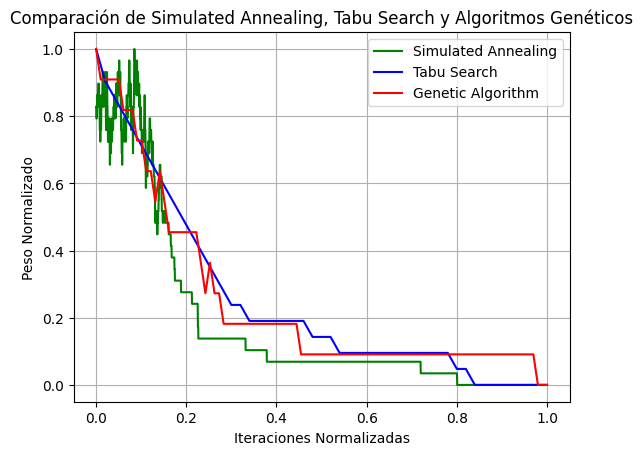

In [22]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 6

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 9  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 12.00000 | actual_sol: 12.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm


 Generations 100 | call_functions 10000 | Best: 21.00

Tiempo de ejecución: 00:00:01
------------------------------------------------


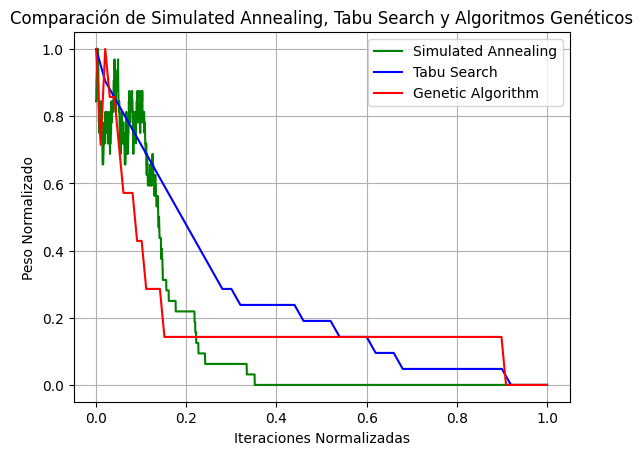

In [23]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 7

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 9  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 13.00000 | actual_sol: 13.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm


 Generations 100 | call_functions 10000 | Best: 19.00

Tiempo de ejecución: 00:00:01
------------------------------------------------


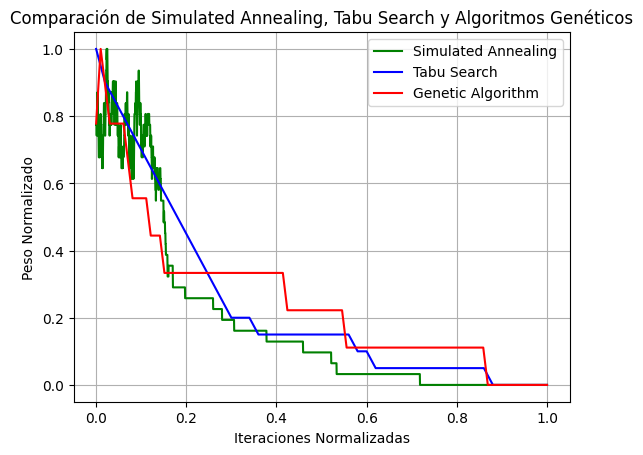

In [24]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 8

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 10  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 14.00000 | actual_sol: 14.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm
Tiempo de ejecución: 00:00:01
------------------------------------------------


 Generations 100 | call_functions 10000 | Best: 18.00

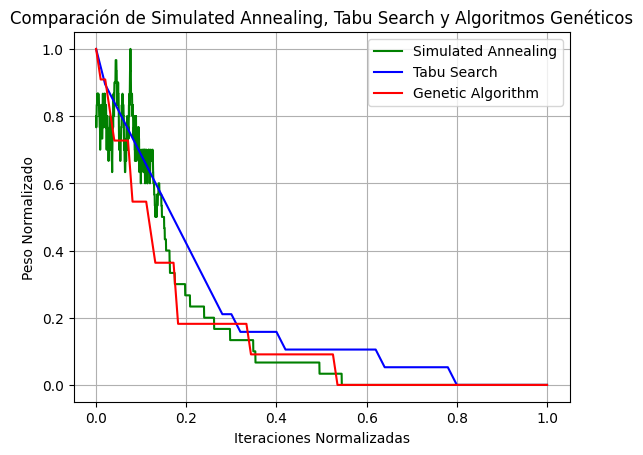

In [25]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 9

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 11  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 14.00000 | actual_sol: 14.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm


 Generations 100 | call_functions 10000 | Best: 22.00

Tiempo de ejecución: 00:00:01
------------------------------------------------


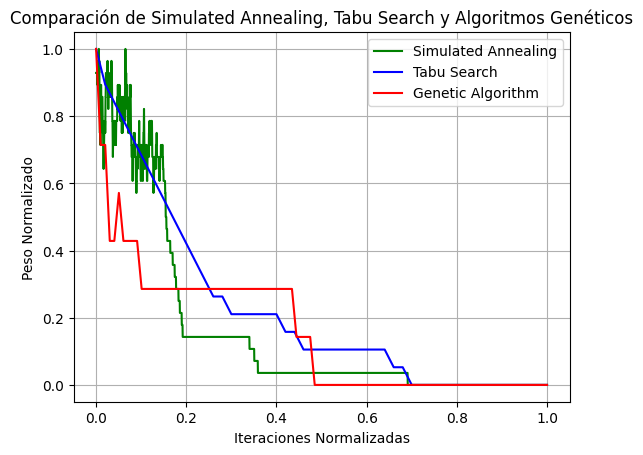

In [26]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


## Prueba 10

Simulated_Annealing
5001 Epoch | Equilibrium 2 | Temperature 0.00 | Cost function: 10  | Aceptance: 100.00 | Function Call: 10000
Tiempo de ejecución: 00:00:01
------------------------------------------------
TabuSearch
iterations 50 | call_functions 10000 | Best: 13.00000 | actual_sol: 13.00000
Tiempo de ejecución: 00:00:01
------------------------------------------------
Genetic Algorithm


 Generations 100 | call_functions 10000 | Best: 17.00

Tiempo de ejecución: 00:00:01
------------------------------------------------


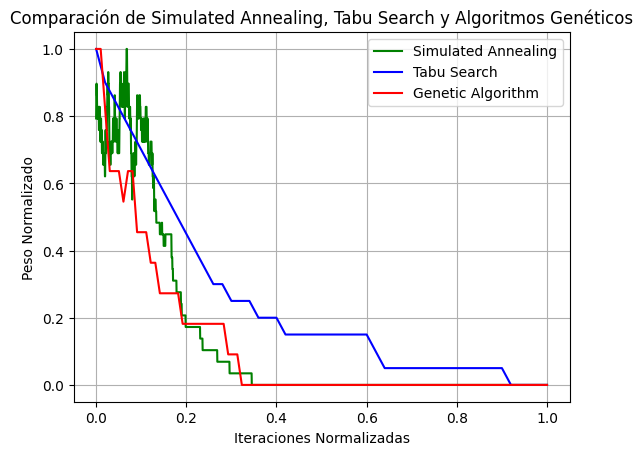

In [27]:
print("Simulated_Annealing")
sa = SA(**parametrosSA)
sa.fit(fn)
valores_optimos_sa.append(sa.cost_[-1])
print("------------------------------------------------")

print( "TabuSearch" )
ts = TS(**parametrosTS)
ts.fit(fn)
valores_optimos_ts.append(ts._cost_best[-1])
print("------------------------------------------------")

print( "Genetic Algorithm" )
ga = GA(**parametrosGA)
ga.evolve(fn)
valores_optimos_ga.append(ga._cost_best[-1])
print("------------------------------------------------")

plt.figure()
scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_SA = scaler_iterations.fit_transform(np.array(list(range(len(sa.cost_)))).reshape(-1, 1)).flatten()
scaler_values_SA = MinMaxScaler()
sa_values_normalized = scaler_values_SA.fit_transform(np.array([sa.cost_]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_SA, sa_values_normalized,color ='green', label='Simulated Annealing')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_tb = scaler_iterations.fit_transform(np.array(list(range(len(ts._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_tb = MinMaxScaler()
tb_values_normalized = scaler_values_tb.fit_transform(np.array([ts._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_tb, tb_values_normalized,color ='blue', label='Tabu Search')

scaler_iterations = MinMaxScaler(feature_range=(0, 1))
iterations_normalized_ga = scaler_iterations.fit_transform(np.array(list(range(len(ga._cost_best)))).reshape(-1, 1)).flatten()
scaler_values_ga = MinMaxScaler()
ga_values_normalized = scaler_values_ga.fit_transform(np.array([ga._cost_best]).reshape(-1, 1)).flatten()
plt.plot(iterations_normalized_ga, ga_values_normalized, color ='red',label='Genetic Algorithm')

plt.xlabel('Iteraciones Normalizadas')
plt.ylabel('Peso Normalizado')
plt.title('Comparación de Simulated Annealing, Tabu Search y Algoritmos Genéticos')
plt.legend()
plt.grid()
plt.show()


# Calculos estadisticos

In [28]:
print("Simulated_Annealing")
print(f"min: {min(valores_optimos_sa)}")
print(f"max: {max(valores_optimos_sa)}")
print(f"prom: {sum(valores_optimos_sa)/len(valores_optimos_sa)}")
print(f"mediana: {calcular_mediana(valores_optimos_sa)}")
print(f"Varianza: {calcular_desviacion_estandar(valores_optimos_sa)}")
print("------------------------------------------------")
print("Tabu Search")
print(f"min: {min(valores_optimos_ts)}")
print(f"max: {max(valores_optimos_ts)}")
print(f"prom: {sum(valores_optimos_ts)/len(valores_optimos_ts)}")
print(f"mediana: {calcular_mediana(valores_optimos_ts)}")
print(f"Varianza: {calcular_desviacion_estandar(valores_optimos_ts)}")
print("------------------------------------------------")
print("Genetic Algorithm")
print(f"min: {min(valores_optimos_ga)}")
print(f"max: {max(valores_optimos_ga)}")
print(f"prom: {sum(valores_optimos_ga)/len(valores_optimos_ga)}")
print(f"mediana: {calcular_mediana(valores_optimos_ga)}")
print(f"Varianza: {calcular_desviacion_estandar(valores_optimos_ga)}")
print("------------------------------------------------")

Simulated_Annealing
min: 9
max: 11
prom: 10.1
mediana: 10.0
Varianza: 0.7000000000000001
------------------------------------------------
Tabu Search
min: 12
max: 15
prom: 13.3
mediana: 13.0
Varianza: 0.9
------------------------------------------------
Genetic Algorithm
min: 16
max: 22
prom: 17.8
mediana: 17.0
Varianza: 2.08806130178211
------------------------------------------------
